# Matrix CUR Sampling Algorithm

In [ ]:
function [A_row_sub,indices]=ROW_SAMPLING_ALGO(A,c)
    m=size(A,1);
    n=size(A,2);
    if c>m
        disp('Number of rows you want to consider exceeding total number of row')
    end
    p=zeros(size(A, 1), 1);
    indices=zeros(c,1);
    t=norm(A, 'fro')^2;
    for x=1:n
        p(x)=norm( A(x,:), 'fro')^2/t;
    end
    
    A_row_sub=zeros(c,n);
    i=1;
    while i<c+1
        [max_value, max_index] = max(p);
        indices(i)=max_index;
        A_row_sub(i,:)=A(max_index,:);
        p(max_index)=min(p)-i;
        i=i+1;
    end
    indices=sort(indices);
    A_row_sub=A( indices,:);

# MATRIX CUR

In [ ]:
function [C,U,R]=MAT_CUR(A,c,r)
    m=size(A,1);
    n=size(A,2);
    
    [col_sub,col_ind]=COL_SAMPLING_ALGO(A,c);
    C=col_sub;
    [row_sub,row_ind]=ROW_SAMPLING_ALGO(A,r);
    R=row_sub;
    U=A(row_ind,col_ind);
    U=MAT_PSEUDOINV(U);

# Let's Validate the RESULT1 wuth r=1

In [ ]:
%Let's define T product based CUR
function [C,U,R]=MAT_CUR(A,c,r)
    m=size(A,1);
    n=size(A,2);
    
    [col_sub,col_ind]=COL_SAMPLING_ALGO(A,c);%A sampling using probability distribution
    C=col_sub;
    [row_sub,row_ind]=ROW_SAMPLING_ALGO(A,r);
    R=row_sub;
    U=A(row_ind,col_ind);
    U=MAT_PSEUDOINV(U);

In [ ]:
u = [1; 2; 4];
v = [4, 5, 6];
A=u*v;
disp('Matrix A is :');
disp(A)
[C,U,R]=MAT_CUR(A,1,1);

tria=C*U*R;
disp('The A-Approximation matrix is :' )
disp(A-tria);

Matrix A is :
     4     5     6
     8    10    12
    16    20    24

The A-Approximation matrix is :
     0     0     0
     0     0     0
     0     0     0

# Tensor CUR

In [ ]:
function [C, U, R] = TENSOR_CUR(A, d1, d2)
    % Input: A - a tensor of size n1 x n2 x n3
    %        d1 - sample size for rows
    %        d2 - sample size for columns
    
    A_tilde = fft(A,[],3);
    
    % Sample row index I and column index J
    %I = randsample(size(A,1), d1);
    %J = randsample(size(A,2), d2);
    
    C = zeros([size(A,1), d2, size(A,3)]);
    R = zeros([d1, size(A,2), size(A,3)]);
    U = zeros([d2,d1,size(A_tilde ,3)]);
    
    for k= 1:size(A_tilde ,3)
        C(:,:,k) = A_tilde(:,1:d2,k);
        R(:,:,k) = A_tilde(1:d1,:,k);
        U(:,:,k) = MAT_PSEUDOINV(A_tilde(1:d1,1:d2,k)); 
    end
    
    C = ifft(C,[],3); 
    R = ifft(R,[],3); 
    U = ifft(U,[],3); 
end

# Time taken by SVD vs Time taken by CUR

In [ ]:
num_singular_values=[1,10,20,30,40,50,60,70,90,100,120,140,160,180,200,220,240,250,256];
% Read the image
%image = imread('dhaimg.jpg');%We know our image is of size 256*256*3

% Convert the image to double precision
%image = im2double(image);
image = randi([0, 0], [256,256,3]);
for i =1:3
    image(:,:,i)=i*eye(256);
end
% Get the dimensions of the image
[m, n, ~] = size(image);  % RGB image has three channels

% Reshape the image into a matrix where each column represents a pixel
X = reshape(image, [], 3);  % Reshape to m*n-by-3 matrix
%X=image;
error_list_svd=zeros(1,length(num_singular_values));
tic;
for j=1:length(num_singular_values)
    % Perform SVD on the reshaped matrix
    [U, S, V] = T_svd_reduced_singular(image,num_singular_values(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=T_product(T_product(U,S),T_transpose(V));
    error_list_svd(j)=frob_norm(image-result)/frob_norm(image);
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    %filename = sprintf('image_%d.png', num_singular_values(j));  % Example filename pattern
    
    % Save the image to a file
    %imwrite(result, filename);  % Save as PNG format
end
toc;
%disp(error_list);
disp(error_list_svd)
plot(num_singular_values, error_list_svd, 'o-', 'LineWidth', 2);

% Add labels and title
xlabel('Number of retained singular values');
ylabel('Relative error in approximation');
title('Singular values vs Error');

% Add grid
grid on;

Elapsed time is 2.074059 seconds.
  Columns 1 through 17

    0.9980    0.9803    0.9601    0.9396    0.9186    0.8970    0.8750    0.8524    0.8053    0.7806    0.7289    0.6731    0.6124    0.5449    0.4677    0.3750    0.2500

  Columns 18 through 19

    0.1531    0.0000

In [ ]:
image = randi([0, 0], [256,256,3]);
for i =1:3
    image(:,:,i)=i*eye(256);
end
% Get the dimensions of the image
[m, n, ~] = size(image);  % RGB image has three channels

% Reshape the image into a matrix where each column represents a pixel
X = reshape(image, [], 3);  % Reshape to m*n-by-3 matrix
%X=image;
error_list_cur=zeros(1,length(num_singular_values));
tic;
for j=1:length(num_singular_values)
    % Perform SVD on the reshaped matrix
    [C, U, R] = TENSOR_CUR(image,num_row_col(j),num_row_col(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=TPRODp(3,TPRODp(3,C,U),R);
    error_list_cur(j)=frob_norm(image-result)/frob_norm(image);
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    %filename = sprintf('image_%d.png', num_row_col(j));  % Example filename pattern
    
    % Save the image to a file
    %imwrite(result, filename);  % Save as PNG format
end
toc;
%disp(error_list);
disp(error_list_cur)
plot(num_row_col, error_list_cur, 'o-', 'LineWidth', 2);

% Add labels and title
xlabel('Number of retained row,columns each');
ylabel('Relative error in approximation');
title('Number of retained row/col vs Error');

% Add grid
grid on;

Elapsed time is 1.144329 seconds.
  Columns 1 through 18

    0.9980    0.9803    0.9601    0.9396    0.9186    0.8970    0.8750    0.8524    0.8053    0.7806    0.7289    0.6731    0.6124    0.5449    0.4677    0.3750    0.2500    0.1531

  Column 19

    0.0000

# Sample Ratio vs Time for SVD and CUR

In [ ]:
A=randi([0,0],[1000,1000,3]);
a=1000;
sample_ratio=[0.01*a,0.02*a,0.03*a,0.04*a,0.05*a,0.06*a,0.07*a,0.08*a,0.09*a,0.1*a];
for i=1:3
   A(:,:,i)=i*eye(1000);
end
[m, n, ~] = size(A);  % RGB image has three channels
image=A;
error_list_svd=zeros(1,length(sample_ratio));

for j=1:length(sample_ratio)
    % Perform SVD on the reshaped matrix
    tic;
    [U, S, V] = T_svd_reduced_singular(image,sample_ratio(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=T_product(T_product(U,S),T_transpose(V));
    error_list_svd(j)=frob_norm(image-result)/frob_norm(image);
    toc;
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    %filename = sprintf('image_%d.png', num_singular_values(j));  % Example filename pattern
    
    % Save the image to a file
    %imwrite(result, filename);  % Save as PNG format
end
disp('Error list is:')
disp(error_list_svd)

svd_sample_ratio
Elapsed time is 0.992901 seconds.
Elapsed time is 1.024103 seconds.
Elapsed time is 0.944207 seconds.
Elapsed time is 1.038061 seconds.
Elapsed time is 0.956605 seconds.
Elapsed time is 0.881423 seconds.
Elapsed time is 0.911635 seconds.
Elapsed time is 0.905173 seconds.
Elapsed time is 0.876401 seconds.
Elapsed time is 0.842329 seconds.
Error list is:
    0.9950    0.9899    0.9849    0.9798    0.9747    0.9695    0.9644    0.9592    0.9539    0.9487

In [ ]:
A=randi([0,0],[1000,1000,3]);
a=1000;
sample_ratio=[0.01*a,0.02*a,0.03*a,0.04*a,0.05*a,0.06*a,0.07*a,0.08*a,0.09*a,0.1*a];
for i=1:3
   A(:,:,i)=i*eye(1000);
end
[m, n, ~] = size(A);  % RGB image has three channels
image=A;
error_list_cur=zeros(1,length(sample_ratio));

for j=1:length(sample_ratio)
    % Perform SVD on the reshaped matrix
    tic;
    [C, U, R] = TENSOR_CUR(image,sample_ratio(j),sample_ratio(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=TPRODp(3,TPRODp(3,C,U),R);
    error_list_cur(j)=frob_norm(image-result)/frob_norm(image);
    toc;
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    %filename = sprintf('image_%d.png', num_singular_values(j));  % Example filename pattern
    
    % Save the image to a file
    %imwrite(result, filename);  % Save as PNG format
end
disp('Error list is:')
disp(error_list_cur)

cur_sample_ratio
Elapsed time is 0.126462 seconds.
Elapsed time is 0.119299 seconds.
Elapsed time is 0.111116 seconds.
Elapsed time is 0.120850 seconds.
Elapsed time is 0.133819 seconds.
Elapsed time is 0.141424 seconds.
Elapsed time is 0.141037 seconds.
Elapsed time is 0.127119 seconds.
Elapsed time is 0.139919 seconds.
Elapsed time is 0.149501 seconds.
Error list is:
    0.9950    0.9899    0.9849    0.9798    0.9747    0.9695    0.9644    0.9592    0.9539    0.9487


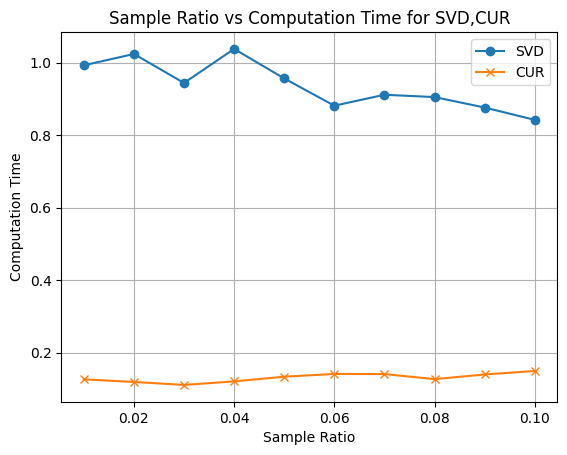

In [4]:
import matplotlib.pyplot as plt

# Data
sample_ratio = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
svd_time = [0.992901,1.024103,0.944207,1.038061,0.956605,0.881423,0.911635,0.905173,0.876401,0.842329]
cur_time = [0.126462 , 0.119299, 0.111116,0.120850,0.133819,0.141424,0.141037,0.127119,0.139919,0.149501]


plt.plot(sample_ratio, svd_time, label='SVD', marker='o')


plt.plot(sample_ratio, cur_time, label='CUR', marker='x')

# Add labels and title
plt.xlabel('Sample Ratio')
plt.ylabel('Computation Time')
plt.title('Sample Ratio vs Computation Time for SVD,CUR')
plt.legend()

# Show plot
plt.grid(True)
plt.savefig('svd_cur_sampleratio_time.png')
plt.show()

# SVD :Number of Singular values vs error

In [ ]:

num_singular_values=[1,10,20,30,40,50,60,70,90,100,120,140,160,180,200,220,240,250,256];
% Read the image
image = imread('dhaimg.jpg');%We know our image is of size 256*256*3

% Convert the image to double precision
image = im2double(image);
%image = randi([0, 0], [256,256,3]);
%for i =1:3
    %image(:,:,i)=i*eye(256);
%end
% Get the dimensions of the image
[m, n, ~] = size(image);  % RGB image has three channels

% Reshape the image into a matrix where each column represents a pixel
X = reshape(image, [], 3);  % Reshape to m*n-by-3 matrix
%X=image;
error_list_svd=zeros(1,length(num_singular_values));

for j=1:length(num_singular_values)
    % Perform SVD on the reshaped matrix
    [U, S, V] = T_svd_reduced_singular(image,num_singular_values(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=T_product(T_product(U,S),T_transpose(V));
    error_list_svd(j)=frob_norm(image-result)/frob_norm(image);
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    filename = sprintf('imageSVD_%d.png', num_singular_values(j));  % Example filename pattern
    
    % Save the image to a file
    imwrite(result, filename);  % Save as PNG format
end

%disp(error_list);
disp(error_list_svd)
plot(num_singular_values, error_list_svd, 'o-', 'LineWidth', 2);

% Add labels and title
xlabel('Number of retained singular values');
ylabel('Relative error in approximation');
title('Singular values vs Error');

% Add grid
grid on;

  Columns 1 through 17

    0.3836    0.2099    0.1552    0.1271    0.1081    0.0941    0.0833    0.0748    0.0616    0.0564    0.0480    0.0415    0.0362    0.0320    0.0284    0.0255    0.0229

  Columns 18 through 19

    0.0218    0.0211

# CUR: Number of rows,columns we have in our hand vs error in approximation

In [ ]:
num_row_col=[1,10,20,30,40,50,60,70,90,100,120,140,160,180,200,220,240,250,256];
% Read the image
image = imread('dhaimg.jpg');%We know our image is of size 256*256*3

% Convert the image to double precision
image = im2double(image);
%image = randi([0, 0], [256,256,3]);
%for i =1:3
    %image(:,:,i)=i*eye(256);
%end
% Get the dimensions of the image
[m, n, ~] = size(image);  % RGB image has three channels

% Reshape the image into a matrix where each column represents a pixel
X = reshape(image, [], 3);  % Reshape to m*n-by-3 matrix
%X=image;
error_list_cur=zeros(1,length(num_row_col));

for j=1:length(num_row_col)
    % Perform SVD on the reshaped matrix
    [C, U, R] = TENSOR_CUR(image,num_row_col(j),num_row_col(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=TPRODp(3,TPRODp(3,C,U),R);
    error_list_cur(j)=frob_norm(image-result)/frob_norm(image);
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    filename = sprintf('image_%d.png', num_row_col(j));  % Example filename pattern
    
    % Save the image to a file
    imwrite(result, filename);  % Save as PNG format
end

%disp(error_list);
disp(error_list_cur)
plot(num_row_col, error_list_cur, 'o-', 'LineWidth', 2);

% Add labels and title
xlabel('Number of retained row,columns each');
ylabel('Relative error in approximation');
title('Number of retained row/col vs Error');

% Add grid
grid on;

cur_comp
   1.0e+44 *

  Columns 1 through 18

    0.0000    1.0566    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000

  Column 19

    0.0000

# CUR vs SVD Error comparison

A=randi([0,0],[1000,1000,3]);
a=1000;
sample_ratio=[0.01*a,0.02*a,0.03*a,0.04*a,0.05*a,0.06*a,0.07*a,0.08*a,0.09*a,0.1*a];
for i=1:3
   % Initialize matrix with rank less than 4
    A(:,:,i) = rand(1000);

    % Ensure the matrix has full rank
    while rank(A(:,:,i)) ~= 1000
        A(:,:,i) = rand(1000);
    end

end
[m, n, ~] = size(A);  % RGB image has three channels
image=A;
error_list_svd=zeros(1,length(sample_ratio));

for j=1:length(sample_ratio)
    % Perform SVD on the reshaped matrix
    tic;
    [U, S, V] = T_svd_reduced_singular(image,sample_ratio(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=T_product(T_product(U,S),T_transpose(V));
    error_list_svd(j)=frob_norm(image-result)/frob_norm(image);
    toc;
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    %filename = sprintf('image_%d.png', num_singular_values(j));  % Example filename pattern
    
    % Save the image to a file
    %imwrite(result, filename);  % Save as PNG format
end
disp('Error list is:')
disp(error_list_svd)

svd_sample_ratio
Elapsed time is 1.215046 seconds.
Elapsed time is 1.165131 seconds.
Elapsed time is 1.234800 seconds.
Elapsed time is 1.065622 seconds.
Elapsed time is 1.072551 seconds.
Elapsed time is 1.029596 seconds.
Elapsed time is 1.073561 seconds.
Elapsed time is 1.232090 seconds.
Elapsed time is 1.119973 seconds.
Elapsed time is 1.103689 seconds.
Error list is:
    0.4903    0.4811    0.4721    0.4634    0.4548    0.4464    0.4381    0.4300    0.4220    0.4141

In [ ]:
sample_ratio=[0.01*a,0.02*a,0.03*a,0.04*a,0.05*a,0.06*a,0.07*a,0.08*a,0.09*a,0.1*a];
%Use the same A
[m, n, ~] = size(A);  % RGB image has three channels
image=A;
error_list_cur=zeros(1,length(sample_ratio));

for j=1:length(sample_ratio)
    % Perform SVD on the reshaped matrix
    tic;
    [C, U, R] = TENSOR_CUR(image,sample_ratio(j),sample_ratio(j));
    % Reshape matrices U, S, and V for multiplication
    %U_reshaped = reshape(U, [], m, 3);  % Reshape U to n1-by-(n1*n3)
    %S_reshaped = reshape(S, m, n, 3);  % Reshape S to n1-by-n2-by-n3
    %V_reshaped = reshape(V, [], n, 3);  % Reshape V to n2-by-(n2*n3)
    %disp(size(U));
    %disp(size(V));
    %disp(size(S));
    result=TPRODp(3,TPRODp(3,C,U),R);
    error_list_cur(j)=frob_norm(image-result)/frob_norm(image);
    toc;
    % Display the image
    %imshow(result);
    
    % Generate the filename for this iteration
    %filename = sprintf('image_%d.png', num_singular_values(j));  % Example filename pattern
    
    % Save the image to a file
    %imwrite(result, filename);  % Save as PNG format
end
disp('Error list is:')
disp(error_list_cur)

cur_sample_ratio
Elapsed time is 0.107861 seconds.
Elapsed time is 0.113979 seconds.
Elapsed time is 0.102179 seconds.
Elapsed time is 0.111734 seconds.
Elapsed time is 0.111326 seconds.
Elapsed time is 0.139757 seconds.
Elapsed time is 0.124465 seconds.
Elapsed time is 0.135939 seconds.
Elapsed time is 0.154809 seconds.
Elapsed time is 0.140294 seconds.
Error list is:
   11.4547   15.0480    3.4308    6.0715   35.4345    5.5774   14.0079    9.1955    4.9105   10.0153

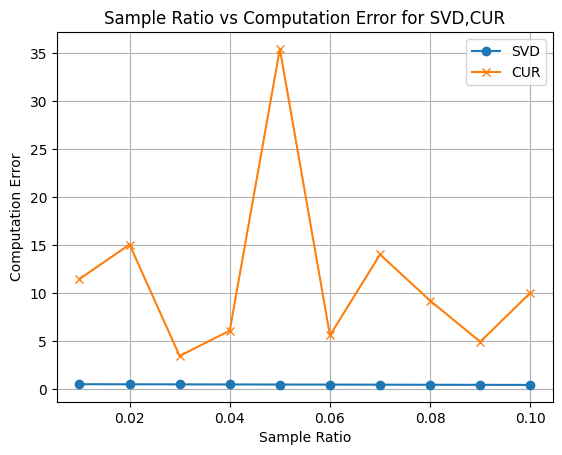

In [6]:
import matplotlib.pyplot as plt

# Data
sample_ratio = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
svd_error = [ 0.4903,    0.4811,    0.4721,    0.4634,    0.4548,    0.4464,    0.4381,    0.4300,    0.4220 ,   0.4141]
cur_error = [11.4547,   15.0480 ,   3.4308,    6.0715,   35.4345,    5.5774,   14.0079,    9.1955 ,   4.9105,   10.0153]


plt.plot(sample_ratio, svd_error, label='SVD', marker='o')


plt.plot(sample_ratio, cur_error, label='CUR', marker='x')

# Add labels and title
plt.xlabel('Sample Ratio')
plt.ylabel('Computation Error')
plt.title('Sample Ratio vs Computation Error for SVD,CUR')
plt.legend()

# Show plot
plt.grid(True)
plt.savefig('svd_cur_sampleratio_error.png')
plt.show()